In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#id 변수 모두 character처리
transaction = pd.read_csv('C:/Users/wjssm/Desktop/kaggle/Elo_Merchant_Category_Recommendation/data/historical_transactions.csv',
                         dtype = {'city_id':np.str, 'merchant_category_id':np.str, 
                                  'merchant_id':np.str,'state_id':np.str, 'subsector_id':np.str})
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [9]:
transaction.shape

(29112361, 14)

In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 object
category_1              object
installments            int64
category_3              object
merchant_category_id    object
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                object
subsector_id            object
dtypes: float64(2), int64(2), object(10)
memory usage: 3.0+ GB


In [11]:
transaction.describe()

,installments,month_lag,purchase_amount,category_2
count,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07
mean,6.484954e-01,-4.487294e+00,3.640090e-02,2.194578e+00
std,2.795577e+00,3.588800e+00,1.123522e+03,1.531896e+00
min,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00
25%,0.000000e+00,-7.000000e+00,-7.203559e-01,1.000000e+00
50%,0.000000e+00,-4.000000e+00,-6.883495e-01,1.000000e+00
75%,1.000000e+00,-2.000000e+00,-6.032543e-01,3.000000e+00
max,9.990000e+02,0.000000e+00,6.010604e+06,5.000000e+00


In [12]:
transaction.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

## 1.card_id
- Card identifier

In [18]:
#card_id unique 개수
len(transaction['card_id'].unique())

325540

In [19]:
#card_id 당 평균 거래 수
transaction['card_id'].value_counts().mean()

89.42790747680776

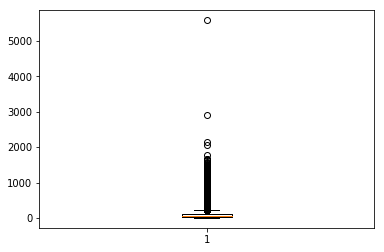

In [25]:
#card_id 별 거래건수에 대한 boxplot
plt.boxplot(transaction['card_id'].value_counts().values)
plt.show()

(array([3.23096e+05, 2.35300e+03, 8.60000e+01, 3.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.000e+00, 5.600e+02, 1.118e+03, 1.676e+03, 2.234e+03, 2.792e+03,
        3.350e+03, 3.908e+03, 4.466e+03, 5.024e+03, 5.582e+03]),
 <a list of 10 Patch objects>)

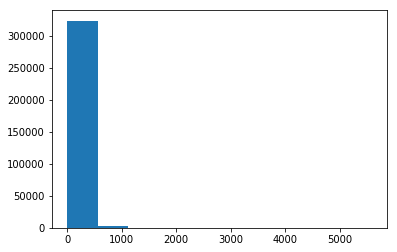

In [24]:
#card_id 별 거래건수에 대한 boxplot
plt.hist(transaction['card_id'].value_counts().values,)

## 2. month_lag
- month lag to reference date

(array([1481070., 1007878., 1085053., 2662570., 1769844., 2050048.,
        5004595., 3095651., 3857276., 7098376.]),
 array([-13. , -11.7, -10.4,  -9.1,  -7.8,  -6.5,  -5.2,  -3.9,  -2.6,
         -1.3,   0. ]),
 <a list of 10 Patch objects>)

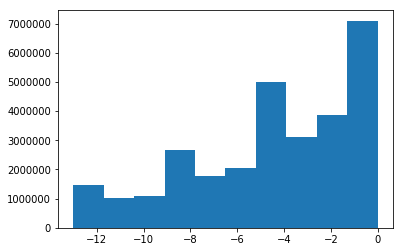

In [27]:
plt.hist(transaction['month_lag'])

{'whiskers': [<matplotlib.lines.Line2D at 0x292edff77f0>,
 'caps': [<matplotlib.lines.Line2D at 0x292ee017d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x292ee017390>],
 'medians': [<matplotlib.lines.Line2D at 0x292ee01a6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x292ee01ab00>],
 'means': []}

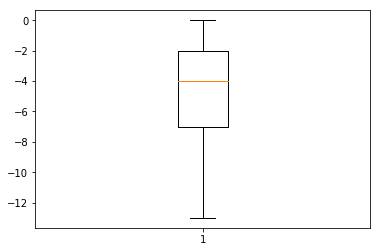

In [26]:
plt.boxplot(transaction['month_lag'])

## 3. purchase_date

In [3]:
transaction['year'] = pd.DatetimeIndex(transaction['purchase_date']).year
transaction['month'] = pd.DatetimeIndex(transaction['purchase_date']).month
#월급날이나 월말, 월초인지 관련 있지 않을까?
transaction['day'] = pd.DatetimeIndex(transaction['purchase_date']).day
transaction['hour'] = pd.DatetimeIndex(transaction['purchase_date']).hour

#### year

In [36]:
#연별 거래 수의 평균
transaction['year'].value_counts().mean()

14556180.5

In [40]:
transaction['year'].value_counts()

2017    23828069
2018     5284292
Name: year, dtype: int64

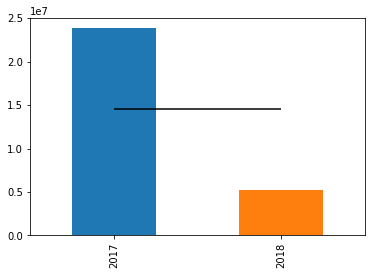

In [59]:
transaction['year'].value_counts().plot('bar')
plt.hlines(y = 14556180.5, xmin = 0, xmax = 1)

#### month

In [45]:
#월별 거래 수의 평균
transaction['month'].value_counts().mean()

2426030.0833333335

In [52]:
transaction['month'].value_counts()

1     4001250
2     3637012
12    3410087
11    2827227
10    2509176
9     2398778
8     2203331
7     2016386
6     1675260
5     1540998
3     1455293
4     1437563
Name: month, dtype: int64

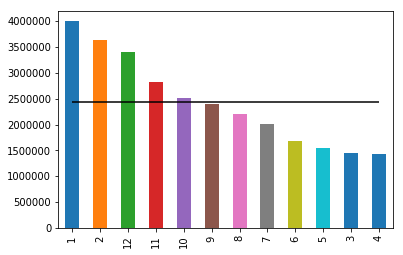

In [60]:
transaction['month'].value_counts().plot('bar')
plt.hlines(y = transaction['month'].value_counts().mean(), xmin = 0, xmax = 11)

#### day

In [61]:
#일별 거래 수의 평균
transaction['day'].value_counts().mean()

939108.4193548387

In [62]:
transaction['day'].value_counts()

20    1037353
22    1014884
6     1004742
16    1003939
21    1002037
9      997030
13     993661
23     992629
17     989820
18     986524
15     984205
7      983373
27     982192
11     982013
10     967070
14     967033
24     960544
28     959408
26     951095
8      941187
5      936998
19     922182
4      920578
2      914948
12     910415
25     904527
1      856717
3      853382
29     852783
30     788152
31     550940
Name: day, dtype: int64

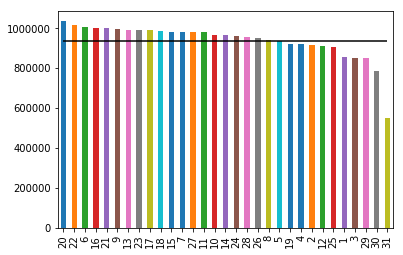

In [64]:
transaction['day'].value_counts().plot('bar')
plt.hlines(y = transaction['day'].value_counts().mean(), xmin = 0, xmax = 30)

#### hour

In [65]:
#시간별 거래 수의 평균
transaction['hour'].value_counts().mean()

1213015.0416666667

In [66]:
transaction['hour'].value_counts()

13    2136786
12    2119599
15    2055245
14    2042870
16    2039291
17    2032684
18    1976501
11    1833164
19    1831153
20    1655062
10    1503421
21    1392813
0     1275458
9     1133893
22    1034842
8      778985
23     726836
7      446702
1      301777
6      229308
2      206033
3      134919
5      126470
4       98549
Name: hour, dtype: int64

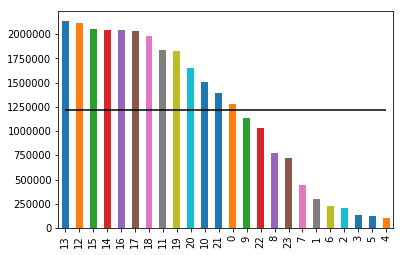

In [68]:
transaction['hour'].value_counts().plot('bar')
plt.hlines(y = transaction['hour'].value_counts().mean(), xmin = 0, xmax = 23)

In [7]:
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,day,hour
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,2017,6,25,15
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,2017,7,15,12
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,2017,8,9,22
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,2017,9,2,10
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,2017,3,10,1


In [13]:
transaction.groupby(['card_id','month'])['month'].count()

card_id          month
C_ID_00007093c1  1        10
                 2        16
                 3        10
                 4        12
                 5        10
                 6        19
                 7        15
                 8        17
                 9         5
                 10       17
                 11        6
                 12       12
C_ID_0001238066  1        26
                 2        24
                 9         2
                 10       11
                 11       23
                 12       37
C_ID_0001506ef0  1         9
                 2        11
                 3         8
                 5         1
                 6         3
                 7         2
                 8         2
                 9         2
                 10        3
                 11        7
                 12       18
C_ID_0001793786  1         2
                          ..
C_ID_ffff579d3a  8        22
                 9        41
                 10 

## 4. authorized_flag
- Y' if approved, 'N' if denied

In [69]:
transaction['authorized_flag'].value_counts()

Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

## 5. Category3
- anonymized category

In [71]:
#cateory3이 NA인 값들 중에서 살펴보기
transaction.loc[transaction['category_3'].isnull(),:].isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3              178159
merchant_category_id         0
merchant_id               7207
month_lag                    0
purchase_amount              0
purchase_date                0
category_2               10087
state_id                     0
subsector_id                 0
year                         0
month                        0
day                          0
hour                         0
dtype: int64

## 6. installments
- number of installments of purchase

In [77]:
transaction['installments'].value_counts()
#-1, 999 NA

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

In [78]:
transaction.loc[transaction['installments']==999, :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,day,hour
227606,N,C_ID_8b04d4734e,210,N,999,C,806,M_ID_0155450c84,-11,6.237415,2017-03-28 19:40:50,1.0,16,9,2017,3,28,19
466436,N,C_ID_7670e569a0,333,N,999,C,813,M_ID_c9526f2dd3,-10,-0.443673,2017-04-12 21:06:28,5.0,21,29,2017,4,12,21
759501,N,C_ID_652976a4bb,19,N,999,C,356,M_ID_2570628257,-8,0.469038,2017-06-05 09:22:18,1.0,9,21,2017,6,5,9
1182532,N,C_ID_24fb1a2959,331,N,999,C,117,M_ID_67a62f2671,-3,0.208778,2017-11-05 01:29:18,1.0,16,2,2017,11,5,1
1198327,N,C_ID_3742a35e45,333,N,999,C,307,M_ID_5f46ec7f98,-8,-0.521510,2017-05-01 11:17:28,5.0,21,19,2017,5,1,11
1221217,N,C_ID_ba84d050f5,19,N,999,C,884,M_ID_8e7a785122,-8,-0.296127,2017-06-25 16:09:55,1.0,9,27,2017,6,25,16
1368209,N,C_ID_5b6278eb25,69,N,999,C,683,M_ID_f86439cec0,-6,-0.674179,2017-08-23 12:39:48,1.0,9,34,2017,8,23,12
1682455,N,C_ID_51ab074d19,69,N,999,C,412,M_ID_dfc0be4604,-5,-0.100768,2017-09-15 17:42:57,1.0,9,18,2017,9,15,17
1767608,N,C_ID_9cea123f42,181,N,999,C,90,M_ID_596749cc5a,0,-0.318652,2018-02-23 17:29:00,5.0,5,22,2018,2,23,17
2063505,N,C_ID_0a3724504a,279,N,999,C,667,M_ID_45bfdc72e8,-4,-0.259147,2017-10-13 18:46:21,1.0,9,21,2017,10,13,18


In [84]:
transaction.loc[transaction['installments']==999, 'card_id'].value_counts()

C_ID_1fa5e84ac3    6
C_ID_f8beeb608f    3
C_ID_105ae2e0d1    2
C_ID_2e39f9fd94    2
C_ID_76859ed625    2
C_ID_45aa34458b    1
C_ID_d234c7bc57    1
C_ID_42fe7f1ce1    1
C_ID_bb7dc47ce0    1
C_ID_ae7caea729    1
C_ID_2f1d667b2d    1
C_ID_7bf3f1f2d2    1
C_ID_7d2577de2f    1
C_ID_69eee5a49b    1
C_ID_5b2a2b3ded    1
C_ID_a58276801c    1
C_ID_1ad317ca97    1
C_ID_ac3997934a    1
C_ID_0f7e480a17    1
C_ID_eefb4d9fcc    1
C_ID_93fb16467d    1
C_ID_7c97a8d5c3    1
C_ID_501e154680    1
C_ID_262dee69d3    1
C_ID_18d774e3ef    1
C_ID_8b04d4734e    1
C_ID_1e9acd6799    1
C_ID_af9c8ec9d5    1
C_ID_3a08ebd0fe    1
C_ID_5f57070e0c    1
                  ..
C_ID_180aa7cfd7    1
C_ID_4058332475    1
C_ID_252c8a606e    1
C_ID_b2f917b366    1
C_ID_b1fe6776d4    1
C_ID_4814fe46a3    1
C_ID_0e00a3c5e2    1
C_ID_094bb1b704    1
C_ID_51ab074d19    1
C_ID_fbce6b2487    1
C_ID_ed598e4184    1
C_ID_b3302b05e1    1
C_ID_9bf3f8355f    1
C_ID_5884bfb2da    1
C_ID_ef6709bf85    1
C_ID_e21148a5eb    1
C_ID_c379d124

In [80]:
#installments가 -1인 경우 category_3은 모두 NA, 특정 card id가 많이 보임
transaction.loc[transaction['installments']==-1, :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,day,hour
885,N,C_ID_fc8e41b9cf,251,N,-1,NaN,34,M_ID_c4f5972059,-1,-0.297615,2018-01-23 12:05:13,3.0,8,38,2018,1,23,12
914,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,391,M_ID_bc5663de31,0,-0.393785,2018-02-21 07:24:59,3.0,8,7,2018,2,21,7
936,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,307,M_ID_0f437c5559,-3,-0.475694,2017-11-13 00:00:00,3.0,8,19,2017,11,13,0
941,Y,C_ID_fc8e41b9cf,170,N,-1,NaN,222,M_ID_b7441bb10f,-1,-0.551563,2018-01-09 14:15:12,3.0,8,21,2018,1,9,14
965,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,514,M_ID_1dd8347bcb,-1,-0.114893,2018-01-23 14:04:39,3.0,8,9,2018,1,23,14
992,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,414,M_ID_d12eaa9bd7,-3,0.421809,2017-11-27 00:00:00,3.0,8,29,2017,11,27,0
1003,Y,C_ID_fc8e41b9cf,251,N,-1,NaN,367,M_ID_b39aa08d22,-2,-0.538791,2017-12-05 11:32:24,3.0,8,16,2017,12,5,11
1031,Y,C_ID_fc8e41b9cf,170,N,-1,NaN,422,M_ID_944c5bc932,-1,-0.611669,2018-01-06 10:40:46,3.0,8,27,2018,1,6,10
1035,Y,C_ID_fc8e41b9cf,170,N,-1,NaN,506,M_ID_4838a2855e,-2,-0.521510,2017-12-06 10:58:34,3.0,8,30,2017,12,6,10
2329,Y,C_ID_058b254a5b,233,N,-1,NaN,68,M_ID_a225855c6f,-2,-0.581616,2017-12-16 10:06:39,1.0,9,27,2017,12,16,10


In [91]:
print('installments -1인 데이터 개수 : ', len(transaction.loc[transaction['installments']==-1, :]) )
print('installments -1인 NA 개수: ',transaction.loc[transaction['installments']==-1, 'category_3'].isnull().sum())

installments -1인 데이터 개수 :  178159
installments -1인 NA 개수:  178159


In [81]:
transaction.loc[transaction['installments']==-1, 'card_id'].value_counts()

C_ID_3423ee4510    58
C_ID_a5e7401c28    47
C_ID_9193ff0ed3    46
C_ID_f408490781    45
C_ID_195a8a9e47    42
C_ID_695671db99    36
C_ID_a35a5de07a    36
C_ID_ab83ffccde    32
C_ID_91c402de95    31
C_ID_9c32b9244e    30
C_ID_5bad4ae043    27
C_ID_32b4aec23a    27
C_ID_ff2455a117    26
C_ID_a61acce4d8    26
C_ID_d846954985    26
C_ID_580c4d9f57    26
C_ID_e13bd5e10c    25
C_ID_db09991fae    25
C_ID_29264459a2    25
C_ID_a558e907a9    24
C_ID_c15714daf0    24
C_ID_5d53d89589    24
C_ID_502c589ce2    24
C_ID_3e8673c112    23
C_ID_e6877d8059    23
C_ID_fbe32697a7    23
C_ID_f3c622072b    23
C_ID_1c856df18a    23
C_ID_a71f0e0f1e    23
C_ID_38bb0029f1    23
                   ..
C_ID_13ec298f22     1
C_ID_2f34966c3b     1
C_ID_2fb8c697e8     1
C_ID_daa65b87e9     1
C_ID_499e599c48     1
C_ID_3bf5ddd264     1
C_ID_9a754edfea     1
C_ID_76ae7336de     1
C_ID_ffb7bae6b7     1
C_ID_bbd26fb36d     1
C_ID_d151e895ef     1
C_ID_774c5ac1cf     1
C_ID_e991599f8f     1
C_ID_8d2c306a6b     1
C_ID_ed73b

In [96]:
transaction.loc[transaction['installments']==-1, 'merchant_id'].value_counts()

M_ID_59764e8cb1    949
M_ID_d0146c836a    602
M_ID_879f625c89    480
M_ID_d13262f4b0    443
M_ID_ad49138777    425
M_ID_b7459adc65    424
M_ID_4e461f7e14    396
M_ID_afae7eb4cc    377
M_ID_a3ee416a9f    363
M_ID_6495f1c97d    305
M_ID_8e80ec421e    274
M_ID_112e15a77b    270
M_ID_73dc78c39f    240
M_ID_dfc0be4604    235
M_ID_82402ab7ed    233
M_ID_de40fbd87c    229
M_ID_fd7f559769    219
M_ID_24ed549464    216
M_ID_387c114289    215
M_ID_fd6537d88d    211
M_ID_cf37dd7fee    207
M_ID_a44f8af310    200
M_ID_89e9e5c469    199
M_ID_c355870ab2    193
M_ID_2cda622fbb    191
M_ID_5cea7e02a8    191
M_ID_eb37ad83fb    183
M_ID_f101a53038    178
M_ID_86ec983688    167
M_ID_9b5f4308c0    164
                  ... 
M_ID_e958342240      1
M_ID_8360c1fb64      1
M_ID_424eaca5f9      1
M_ID_8e54f7cf6c      1
M_ID_4b18a5ea6e      1
M_ID_047dde8ad6      1
M_ID_fbaaa4d161      1
M_ID_de18883423      1
M_ID_b3a8bf18ab      1
M_ID_53c15ad4e5      1
M_ID_1fe464eba3      1
M_ID_57fdfea10b      1
M_ID_46510d

## 7. category_1
- anonymized category


In [85]:
transaction['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

## 8. merchant_category_id
- Merchant category identifier (anonymized )

In [95]:
print('merchant_category_id unique 개수 : ', len(transaction['merchant_category_id'].unique()))

merchant_category_id unique 개수 :  327


## 9. subsector_id
- Merchant category group identifier (anonymized )

In [97]:
print('subsector_id unique 개수 : ', len(transaction['subsector_id'].unique()))

subsector_id unique 개수 :  41


## 10. merchant_id - NA	138481
- Merchant identifier (anonymized)


In [14]:
print('merchant_id unique 개수 : ', len(transaction['merchant_id'].unique()))

merchant_id unique 개수 :  326312


## 11. purchase_amount
- Normalized purchase amount

In [15]:
transaction['purchase_amount'].mean()

0.03640090136488929

In [18]:
transaction['purchase_amount'].quantile([0,0.25,0.5,0.75,1])

0.00   -7.469078e-01
0.25   -7.203559e-01
0.50   -6.883495e-01
0.75   -6.032543e-01
1.00    6.010604e+06
Name: purchase_amount, dtype: float64

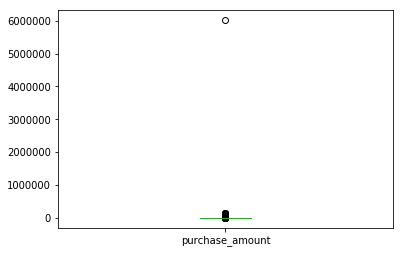

In [16]:
transaction['purchase_amount'].plot('box')

#### purchase_amount outlier

In [20]:
transaction.loc[transaction['purchase_amount'] == transaction['purchase_amount'].max(), :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,day,hour
29050360,N,C_ID_3b6ac8e52d,69,N,0,A,683,M_ID_ee49262ab5,-3,6.010604e+06,2017-04-23 06:58:58,1.0,9,34,2017,4,23,6


In [23]:
#purchase_amount outlier를 갖는 card_id 살펴봄
transaction.loc[transaction['card_id']=='C_ID_3b6ac8e52d', :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,day,hour
29050356,Y,C_ID_3b6ac8e52d,231,N,0,A,705,M_ID_25e9e3043a,0,-7.275236e-01,2017-07-28 09:34:37,1.0,9,33,2017,7,28,9
29050357,Y,C_ID_3b6ac8e52d,231,N,0,A,489,M_ID_df298c39a7,0,-7.288760e-01,2017-07-28 09:32:25,1.0,9,16,2017,7,28,9
29050358,Y,C_ID_3b6ac8e52d,69,N,0,A,683,M_ID_22eeb27f6c,0,-7.423998e-01,2017-07-03 08:52:34,1.0,9,34,2017,7,3,8
29050359,Y,C_ID_3b6ac8e52d,231,N,0,A,80,M_ID_5ba019a379,-2,-7.251194e-01,2017-05-13 12:25:43,1.0,9,37,2017,5,13,12
29050360,N,C_ID_3b6ac8e52d,69,N,0,A,683,M_ID_ee49262ab5,-3,6.010604e+06,2017-04-23 06:58:58,1.0,9,34,2017,4,23,6
29050361,Y,C_ID_3b6ac8e52d,231,N,0,A,705,M_ID_1d7f00ffb5,0,-7.255251e-01,2017-07-28 09:44:56,1.0,9,33,2017,7,28,9
29050362,Y,C_ID_3b6ac8e52d,231,N,0,A,705,M_ID_de98b1e94e,0,-7.085601e-01,2017-07-29 13:07:34,1.0,9,33,2017,7,29,13
29050363,Y,C_ID_3b6ac8e52d,231,N,0,A,80,M_ID_5ba019a379,-3,-7.378919e-01,2017-04-28 16:24:56,1.0,9,37,2017,4,28,16
29050364,Y,C_ID_3b6ac8e52d,231,N,0,A,528,M_ID_188e75244b,0,-7.258707e-01,2017-07-28 17:47:41,1.0,9,25,2017,7,28,17
29050365,Y,C_ID_3b6ac8e52d,231,N,0,A,367,M_ID_fff0c467ae,0,-7.423998e-01,2017-07-14 09:31:02,1.0,9,16,2017,7,14,9


In [24]:
#purchase_amount outlier를 갖는 merchant_id 살펴봄
transaction.loc[transaction['merchant_id']=='M_ID_ee49262ab5', :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,year,month,day,hour
572788,Y,C_ID_0faccae22b,69,N,0,A,683,M_ID_ee49262ab5,-8,-7.401459e-01,2017-06-20 21:25:15,1.0,9,34,2017,6,20,21
573010,N,C_ID_0faccae22b,69,N,0,A,683,M_ID_ee49262ab5,-8,-7.401459e-01,2017-06-20 21:26:03,1.0,9,34,2017,6,20,21
573189,Y,C_ID_0faccae22b,69,N,0,A,683,M_ID_ee49262ab5,-8,-7.416485e-01,2017-06-22 23:40:20,1.0,9,34,2017,6,22,23
573634,Y,C_ID_0faccae22b,69,N,0,A,683,M_ID_ee49262ab5,-8,-7.401459e-01,2017-06-20 23:20:34,1.0,9,34,2017,6,20,23
573641,Y,C_ID_0faccae22b,69,N,0,A,683,M_ID_ee49262ab5,-8,-7.439025e-01,2017-06-21 00:01:34,1.0,9,34,2017,6,21,0
714558,Y,C_ID_b703e951df,69,N,0,A,683,M_ID_ee49262ab5,0,-7.446538e-01,2018-02-27 17:05:33,1.0,9,34,2018,2,27,17
714563,Y,C_ID_b703e951df,69,N,0,A,683,M_ID_ee49262ab5,0,-7.431512e-01,2018-02-26 16:23:32,1.0,9,34,2018,2,26,16
714565,Y,C_ID_b703e951df,69,N,0,A,683,M_ID_ee49262ab5,-1,-7.439025e-01,2018-01-30 20:44:09,1.0,9,34,2018,1,30,20
714568,N,C_ID_b703e951df,69,N,0,A,683,M_ID_ee49262ab5,-6,-7.446538e-01,2017-08-01 17:46:09,1.0,9,34,2017,8,1,17
714571,Y,C_ID_b703e951df,69,N,0,A,683,M_ID_ee49262ab5,-1,-7.439025e-01,2018-01-30 15:43:57,1.0,9,34,2018,1,30,15


## 12.city_id
- City identifier (anonymized )

In [27]:
print('city_id unique 개수 : ', len(transaction['city_id'].unique()))

city_id unique 개수 :  308


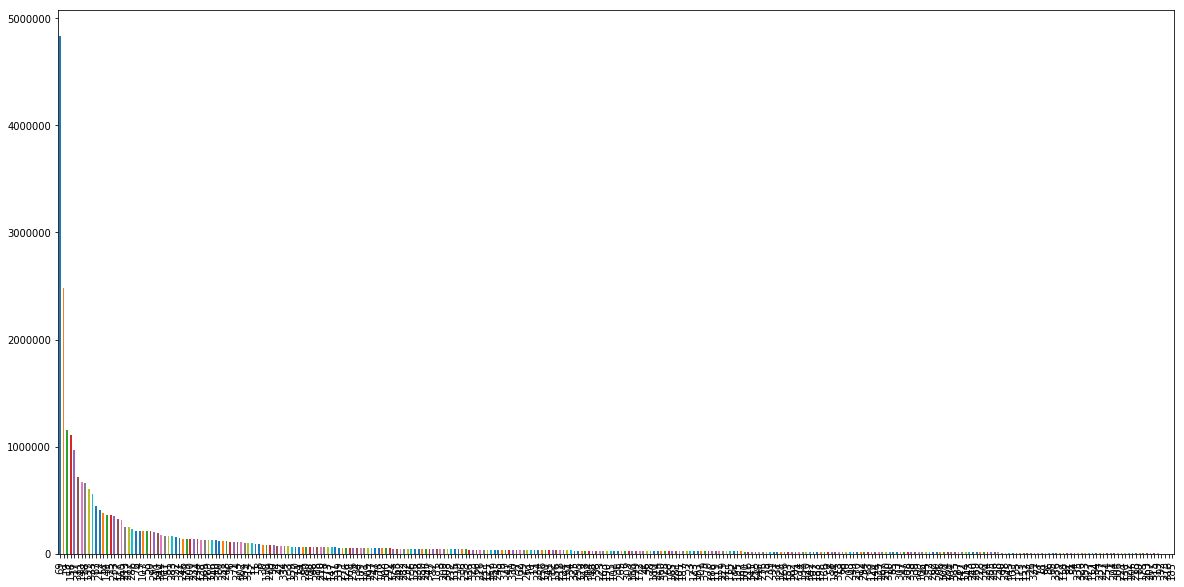

In [33]:
#city_id 별 거래건수에 대한 barplot
plt.figure(figsize = (20,10))
transaction['city_id'].value_counts().plot('bar')

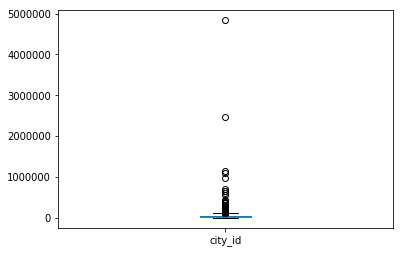

In [35]:
transaction['city_id'].value_counts().plot('box')

In [36]:
#city_id 가 69인 경우 제일 거래 수 많음
transaction['city_id'].value_counts()

69     4835441
-1     2478624
19     1151077
158    1113013
17      971714
331     714414
143     668769
88      659328
137     603023
333     561144
87      444940
212     406196
57      382232
149     359540
25      356757
233     355108
117     322414
160     317617
213     248371
277     247294
286     231877
76      216048
4       212403
107     210182
53      209668
20      207650
291     199983
140     190359
344     177694
161     168745
        ...   
32        8382
81        8278
54        8201
235       7918
326       7912
293       7804
327       7499
112       7461
84        7367
237       7285
227       7233
254       7143
71        6781
204       6745
306       6128
221       6096
130       5657
122       5458
205       5385
215       4791
89        4760
178       4430
263       4003
207       3905
315       3845
319       1645
92         758
273        620
316        149
185         45
Name: city_id, Length: 308, dtype: int64

## 13. state_id
- State identifier (anonymized )

In [37]:
print('state_id unique 개수 : ', len(transaction['state_id'].unique()))

state_id unique 개수 :  25


In [38]:
#state_id 가 9인 경우 제일 거래 수 많음
transaction['state_id'].value_counts()

9     10568881
-1     2652864
16     2143420
15     2079255
5      1655124
19     1204287
20     1141197
22      971714
21      929594
4       840820
7       640712
13      634006
11      631127
3       542220
12      385643
18      384876
2       371728
1       247753
10      222463
23      206011
24      205952
14      171513
8       157829
17      116139
6         7233
Name: state_id, dtype: int64

## 14.category_2 - NA 2652864
- anonymized category

In [39]:
#category_2 가 1인 경우 제일 거래 수 많음
transaction['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64